# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import eda_helper_functions
from sklearn.ensemble import IsolationForest

# Reading the data

In [2]:
file_path = r"/Users/jayantbhatia/Desktop/flight_sagemaker_project/data/training_data.csv"


train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-05-15,Kolkata,Banglore,05:50:00,12:30:00,1840,2.0,No Info,12723
1,Jet Airways,2019-05-09,Delhi,Cochin,02:15:00,12:35:00,620,1.0,In-flight meal not included,12373
2,Indigo,2019-06-21,Kolkata,Banglore,21:25:00,00:05:00,160,0.0,No Info,4804
3,Indigo,2019-03-01,Mumbai,Hyderabad,09:10:00,10:40:00,90,0.0,No Info,13999
4,Jet Airways,2019-06-06,Delhi,Cochin,09:40:00,19:00:00,560,2.0,In-flight meal not included,10368
...,...,...,...,...,...,...,...,...,...,...
635,Vistara,2019-06-09,Banglore,Delhi,17:00:00,19:35:00,155,0.0,No Info,4878
636,Jet Airways,2019-05-21,Kolkata,Banglore,20:00:00,08:15:00,735,1.0,In-flight meal not included,10844
637,Indigo,2019-06-21,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info,3943
638,Jet Airways,2019-05-03,Banglore,Delhi,08:20:00,11:20:00,180,0.0,No Info,7229


In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:,col], dayfirst = True)
    for col in ["date_of_journey","dep_time","arrival_time"]   
})

In [5]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-05-15,Kolkata,Banglore,2024-07-16 05:50:00,2024-07-16 12:30:00,1840,2.0,No Info,12723
1,Jet Airways,2019-05-09,Delhi,Cochin,2024-07-16 02:15:00,2024-07-16 12:35:00,620,1.0,In-flight meal not included,12373
2,Indigo,2019-06-21,Kolkata,Banglore,2024-07-16 21:25:00,2024-07-16 00:05:00,160,0.0,No Info,4804
3,Indigo,2019-03-01,Mumbai,Hyderabad,2024-07-16 09:10:00,2024-07-16 10:40:00,90,0.0,No Info,13999
4,Jet Airways,2019-06-06,Delhi,Cochin,2024-07-16 09:40:00,2024-07-16 19:00:00,560,2.0,In-flight meal not included,10368
...,...,...,...,...,...,...,...,...,...,...
635,Vistara,2019-06-09,Banglore,Delhi,2024-07-16 17:00:00,2024-07-16 19:35:00,155,0.0,No Info,4878
636,Jet Airways,2019-05-21,Kolkata,Banglore,2024-07-16 20:00:00,2024-07-16 08:15:00,735,1.0,In-flight meal not included,10844
637,Indigo,2019-06-21,Banglore,Delhi,2024-07-16 06:05:00,2024-07-16 08:50:00,165,0.0,No Info,3943
638,Jet Airways,2019-05-03,Banglore,Delhi,2024-07-16 08:20:00,2024-07-16 11:20:00,180,0.0,No Info,7229


In [6]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

# High-level summary of the data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [8]:
train.describe()

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,648.898438,0.840625,9287.279688
std,487.731885,0.632633,4454.801594
min,75.000000,0.000000,1840.000000
25%,180.000000,0.000000,5769.000000
50%,540.000000,1.000000,8586.000000
75%,930.000000,1.000000,12497.000000
max,2300.000000,3.000000,26890.000000


In [9]:
(
   train
    .assign(total_stops = train["total_stops"].astype(object))
    .describe(include= "O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,6
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,235,264,264,371.0,498


# High level analysis of Missing value

In [10]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


- We have no missing value in our training dataset

# High level analysis of Outliers

In [11]:
forest = IsolationForest(n_estimators = 10, random_state = 42 )

In [12]:
(
    train
    .assign(outlier = forest.fit_predict(train
                                         .drop(columns = 'price')
                                         .select_dtypes(include ='number'))
           )
    .query("outlier == -1")
    
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Air India,2019-05-15,Kolkata,Banglore,2024-07-16 05:50:00,2024-07-16 12:30:00,1840,2.0,No Info,12723,-1
3,Indigo,2019-03-01,Mumbai,Hyderabad,2024-07-16 09:10:00,2024-07-16 10:40:00,90,0.0,No Info,13999,-1
4,Jet Airways,2019-06-06,Delhi,Cochin,2024-07-16 09:40:00,2024-07-16 19:00:00,560,2.0,In-flight meal not included,10368,-1
6,Jet Airways,2019-05-18,Kolkata,Banglore,2024-07-16 05:45:00,2024-07-16 09:20:00,1655,1.0,No Info,14388,-1
13,Jet Airways,2019-06-09,Kolkata,Banglore,2024-07-16 20:25:00,2024-07-16 23:35:00,1630,1.0,No Info,12692,-1
...,...,...,...,...,...,...,...,...,...,...,...
630,Spicejet,2019-05-06,Mumbai,Hyderabad,2024-07-16 05:45:00,2024-07-16 07:15:00,90,0.0,No check-in baggage included,1965,-1
631,Air India,2019-06-01,Delhi,Cochin,2024-07-16 22:00:00,2024-07-16 19:15:00,1275,2.0,No Info,10861,-1
632,Indigo,2019-04-03,Kolkata,Banglore,2024-07-16 19:20:00,2024-07-16 23:45:00,265,1.0,No Info,3480,-1
633,Air India,2019-05-21,Kolkata,Banglore,2024-07-16 09:25:00,2024-07-16 05:35:00,1210,2.0,No Info,11432,-1


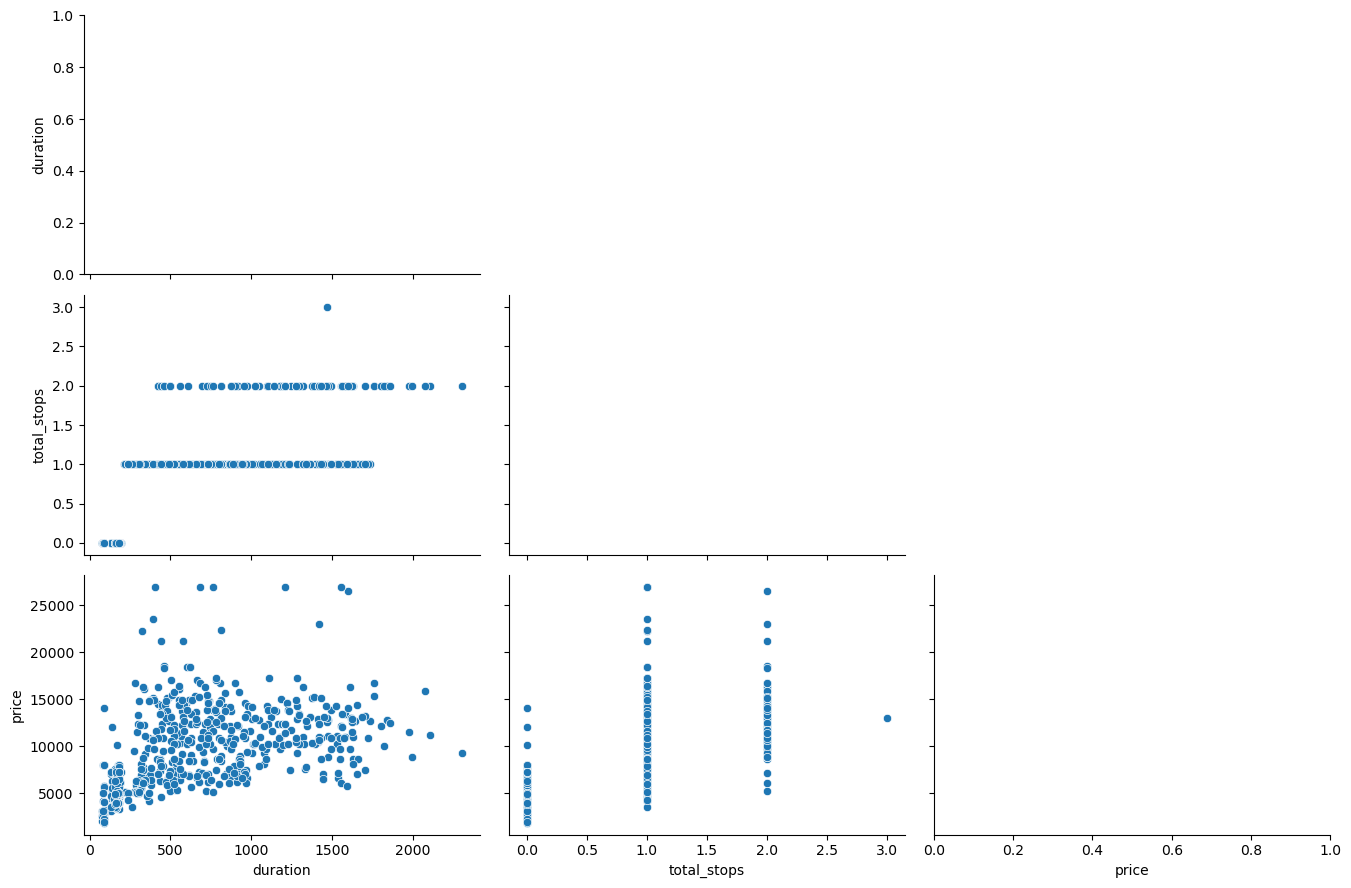

In [13]:
eda_helper_functions.pair_plots(train)

# Correlation Analysis

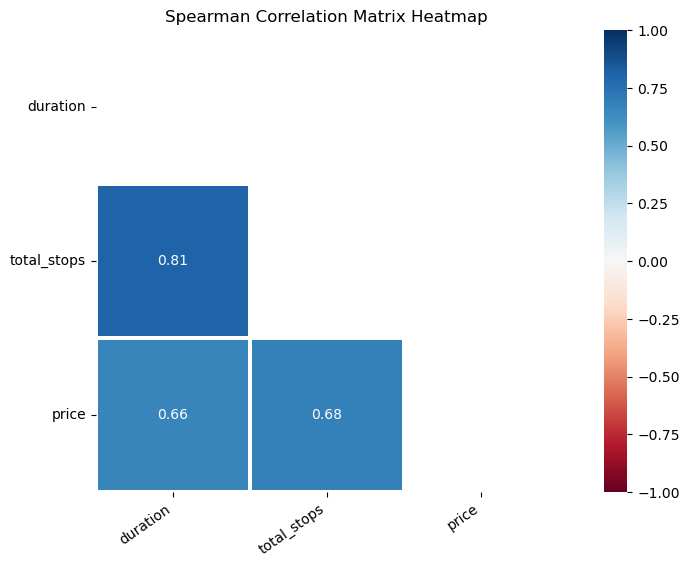

In [14]:
eda_helper_functions.correlation_heatmap(train)

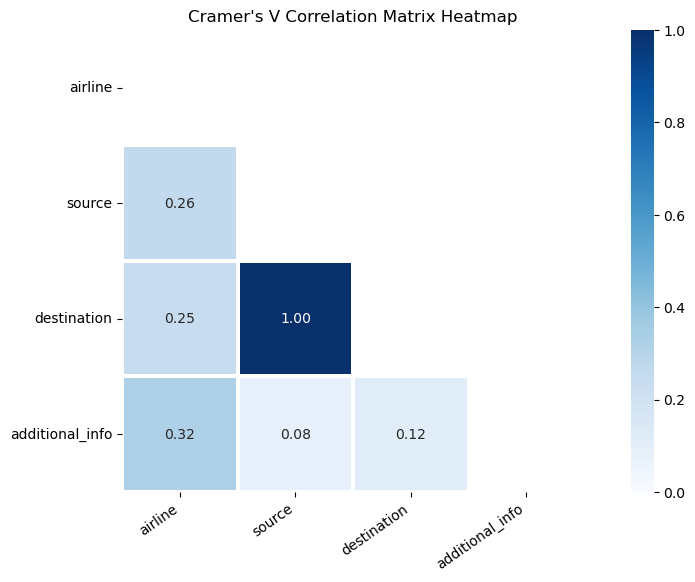

In [15]:
eda_helper_functions.cramersV_heatmap(train)

# Detailed Analysis

In [16]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [17]:
train.airline

0        Air India
1      Jet Airways
2           Indigo
3           Indigo
4      Jet Airways
          ...     
635        Vistara
636    Jet Airways
637         Indigo
638    Jet Airways
639         Indigo
Name: airline, Length: 640, dtype: object

## 1. Airline

In [18]:
eda_helper_functions.cat_summary(train, "airline")

0        Air India
1      Jet Airways
2           Indigo
3           Indigo
4      Jet Airways
          ...     
635        Vistara
636    Jet Airways
637         Indigo
638    Jet Airways
639         Indigo
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,235


,count,percentage
category,,
Jet Airways,235,0.367188
Indigo,113,0.176563
Air India,112,0.175000
Multiple Carriers,74,0.115625
Spicejet,41,0.064062
Vistara,24,0.037500
Air Asia,22,0.034375
Goair,19,0.029687


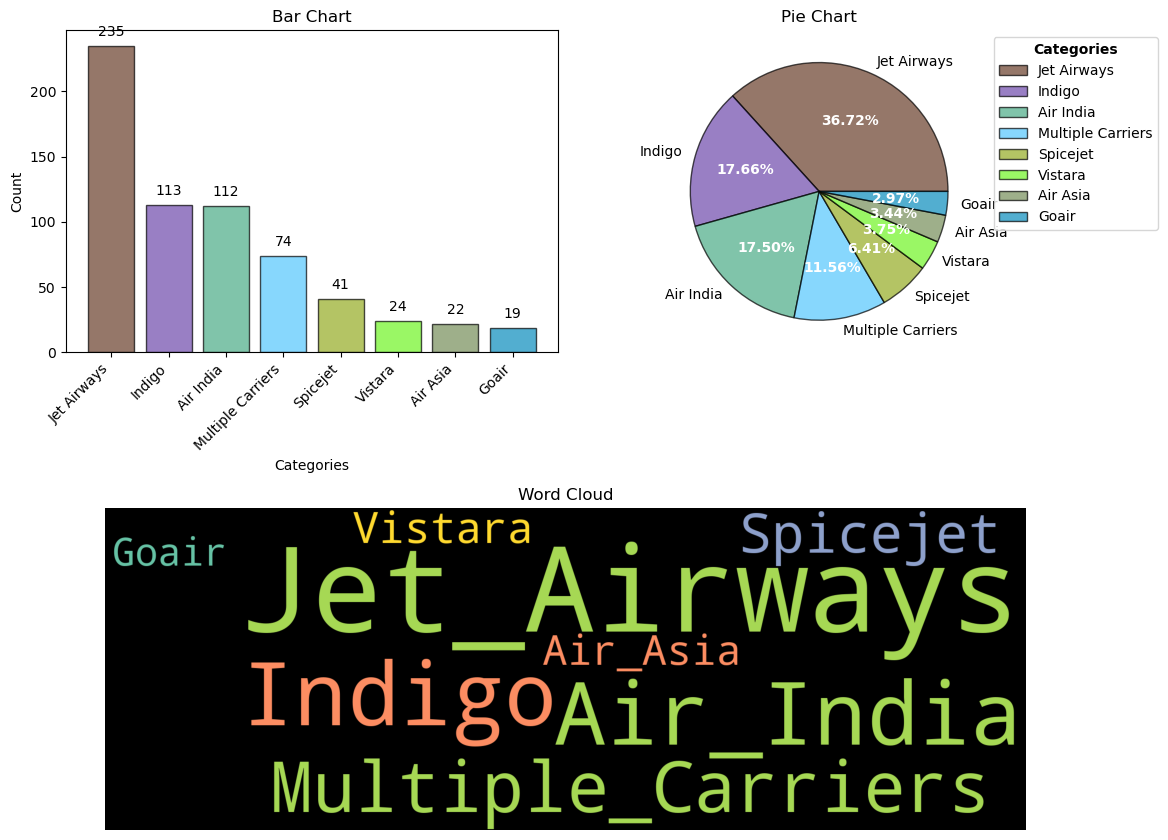

In [19]:
eda_helper_functions.cat_univar_plots(train, "airline")

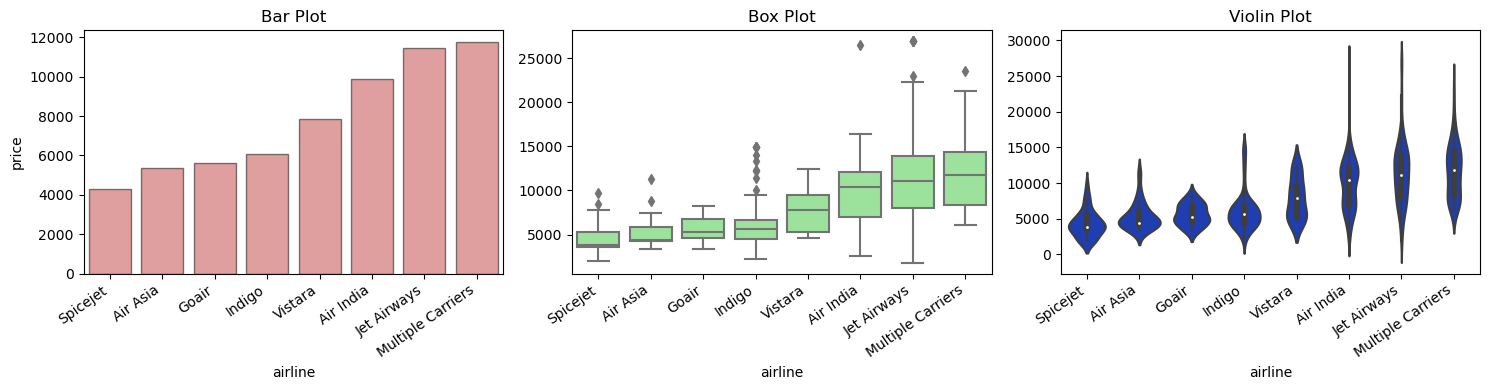

In [20]:
eda_helper_functions.num_cat_bivar_plots(
    data = train,
    num_var = "price",
    cat_var = "airline"    
)

In [21]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 48.173961360832024
- p-value              : 8.151476750246436e-55
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 265.7391790097785
- p-value              : 1.2320962467262507e-53
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


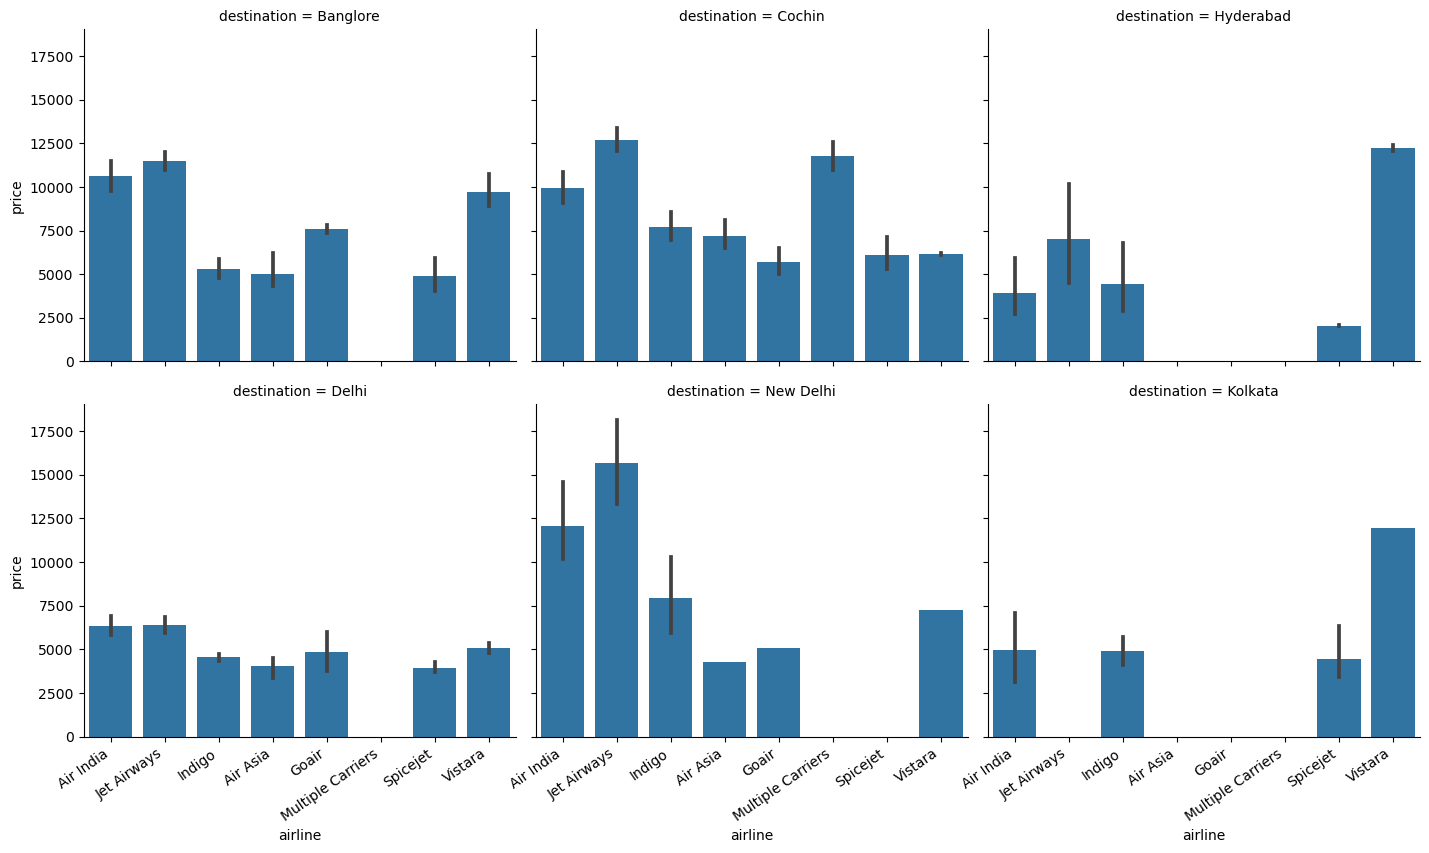

In [22]:
airline_grid = sns.FacetGrid(
    data = train,
    col = "destination",
    col_wrap = 3,
    height = 4,
    aspect = 1.2,
    sharey = True
)

airline_grid.map(sns.barplot, "airline", "price", order = train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

## 2. Date_of_Journey

In [23]:
train.date_of_journey

0     2019-05-15
1     2019-05-09
2     2019-06-21
3     2019-03-01
4     2019-06-06
         ...    
635   2019-06-09
636   2019-05-21
637   2019-06-21
638   2019-05-03
639   2019-06-12
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

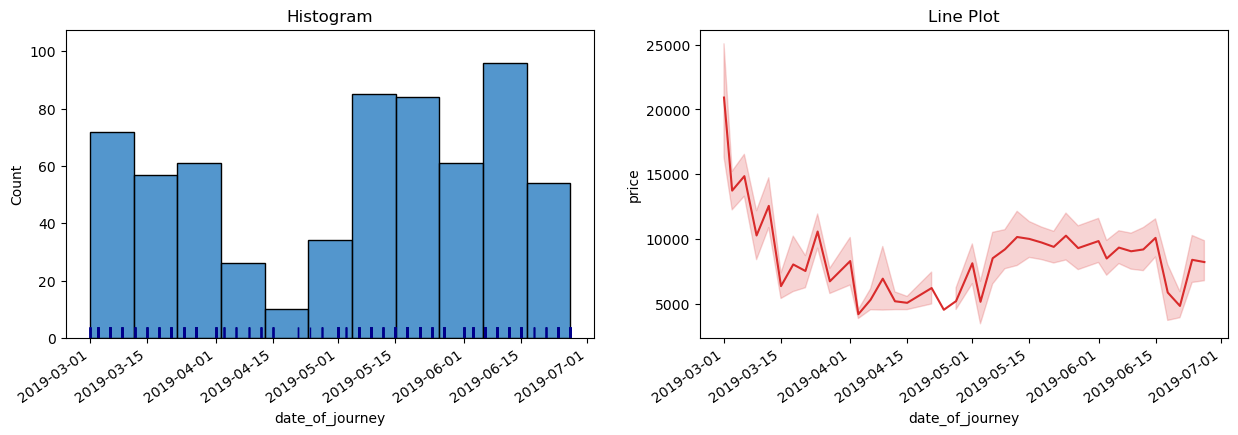

In [24]:
eda_helper_functions.dt_univar_plots(
    data = train,
    var = "date_of_journey",
    target = "price"
)

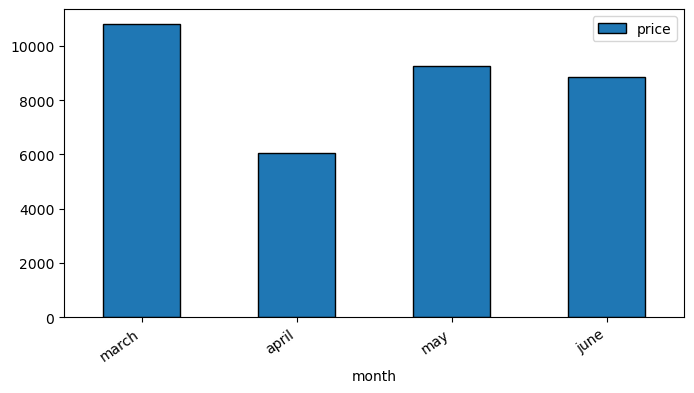

In [25]:
(
    train
    .groupby(pd.Grouper(key ="date_of_journey",freq ="M"))
    .price.mean()
    .to_frame()
    .set_axis(["march","april","may","june"], axis = 0)
    .rename_axis(index = "month")
    .plot(
        kind = "bar",
        figsize =(8,4),
        edgecolor = "black"
        
    )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

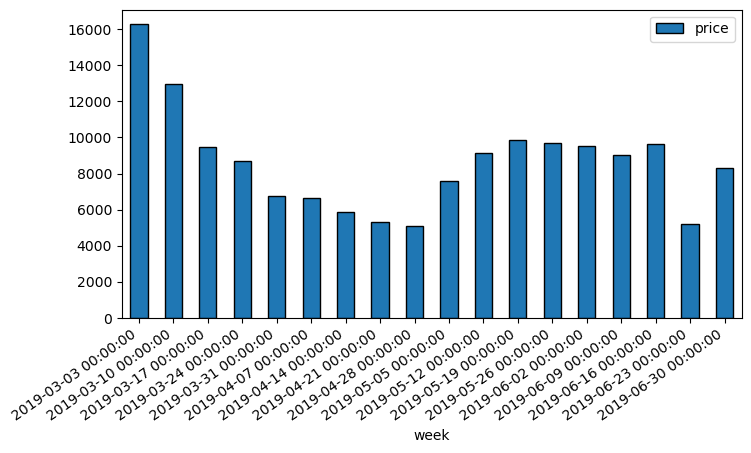

In [26]:
(
    train
    .groupby(pd.Grouper(key ="date_of_journey",freq ="W"))
    .price.mean()
    .to_frame()
   
    .rename_axis(index = "week")
    .plot(
        kind = "bar",
        figsize =(8,4),
        edgecolor = "black"
        
    )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

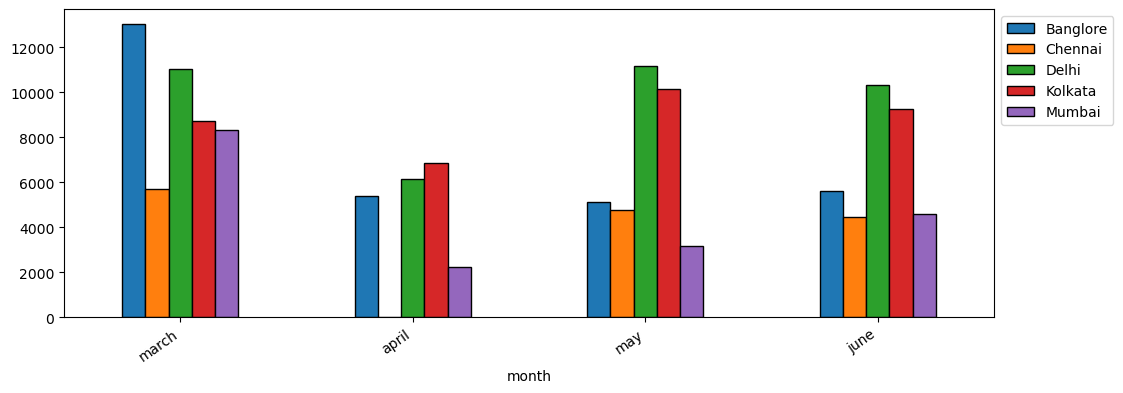

In [27]:
(
    train
    .groupby([pd.Grouper(key ="date_of_journey",freq ="M"),"source"])
    .price.mean()
    .unstack()
    .set_axis(["march","april","may","june"], axis = 0)
    .rename_axis(index = "month")
    .plot(
        kind = "bar",
        figsize =(12,4),
        edgecolor = "black"
        
    )
)
ax = plt.gca()
ax.legend(
    loc = "upper left",
    bbox_to_anchor= (1,1)
)
eda_helper_functions.rotate_xlabels(ax)

## 3. Dep Time

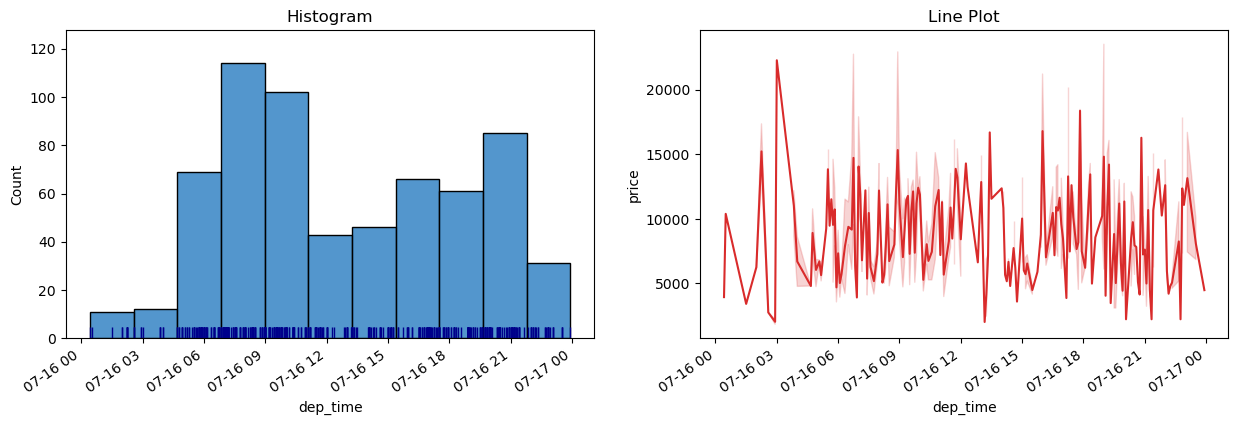

In [28]:
eda_helper_functions.dt_univar_plots(
    data = train,
    var = "dep_time",
    target = "price"
)

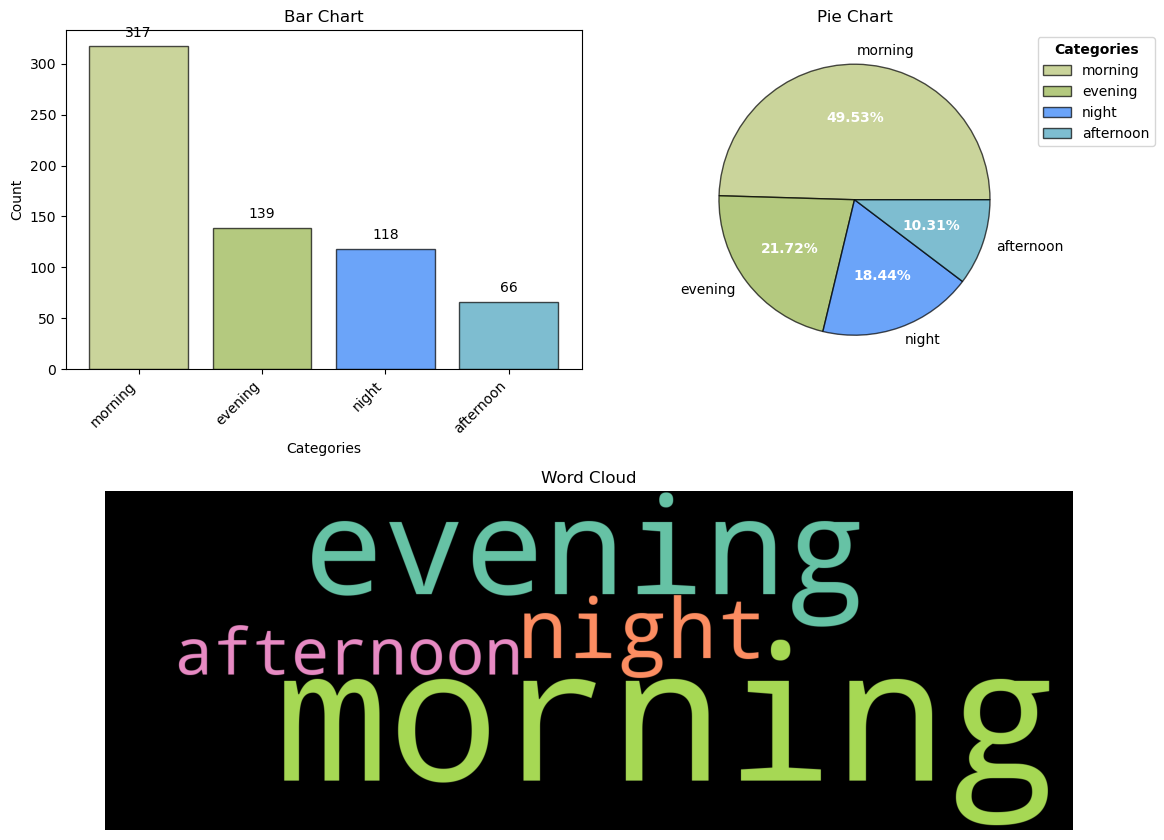

In [29]:
(
    train
    .assign(dep_time = lambda df_: (
            np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                       df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                       df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                       ["morning",
                        "afternoon",
                        "evening"],
                         default = "night"))
           )
    .pipe(eda_helper_functions.cat_univar_plots, "dep_time")
    
)

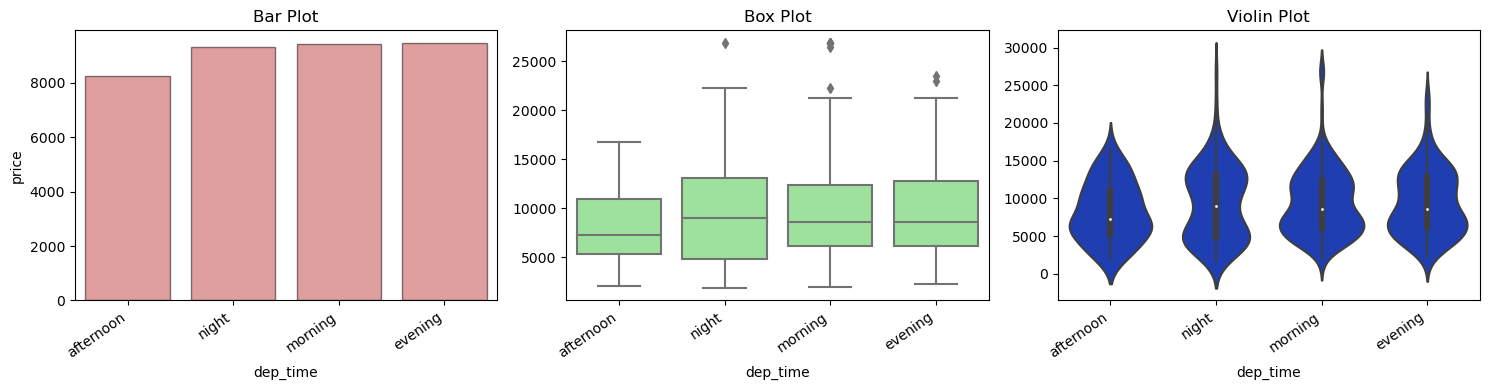

In [30]:
(
    train
    .assign(dep_time = lambda df_: (
            np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                       df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                       df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                       ["morning",
                        "afternoon",
                        "evening"],
                         default = "night"))
           )
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price", "dep_time")
    
)

## 4. Duration

In [31]:
train.duration

0      1840
1       620
2       160
3        90
4       560
       ... 
635     155
636     735
637     165
638     180
639     490
Name: duration, Length: 640, dtype: int64

In [32]:
eda_helper_functions.num_summary(train, "duration")

0      1840
1       620
2       160
3        90
4       560
       ... 
635     155
636     735
637     165
638     180
639     490
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.0
5,90.0
10,150.0
25,180.0
50,540.0
75,930.0
90,1431.0
95,1600.5
99,1840.0


,value
mean,648.898438
trimmed mean (5%),618.758681
trimmed mean (10%),592.695312
median,540.000000


,value
var,237882.391860
std,487.731885
IQR,750.000000
mad,365.000000
coef_variance,0.751631


,value
skewness,0.806339
kurtosis,-0.267794


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.372208884188452e-19
Test Statistic       : 0.9043270349502563
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 18.980905204167584
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


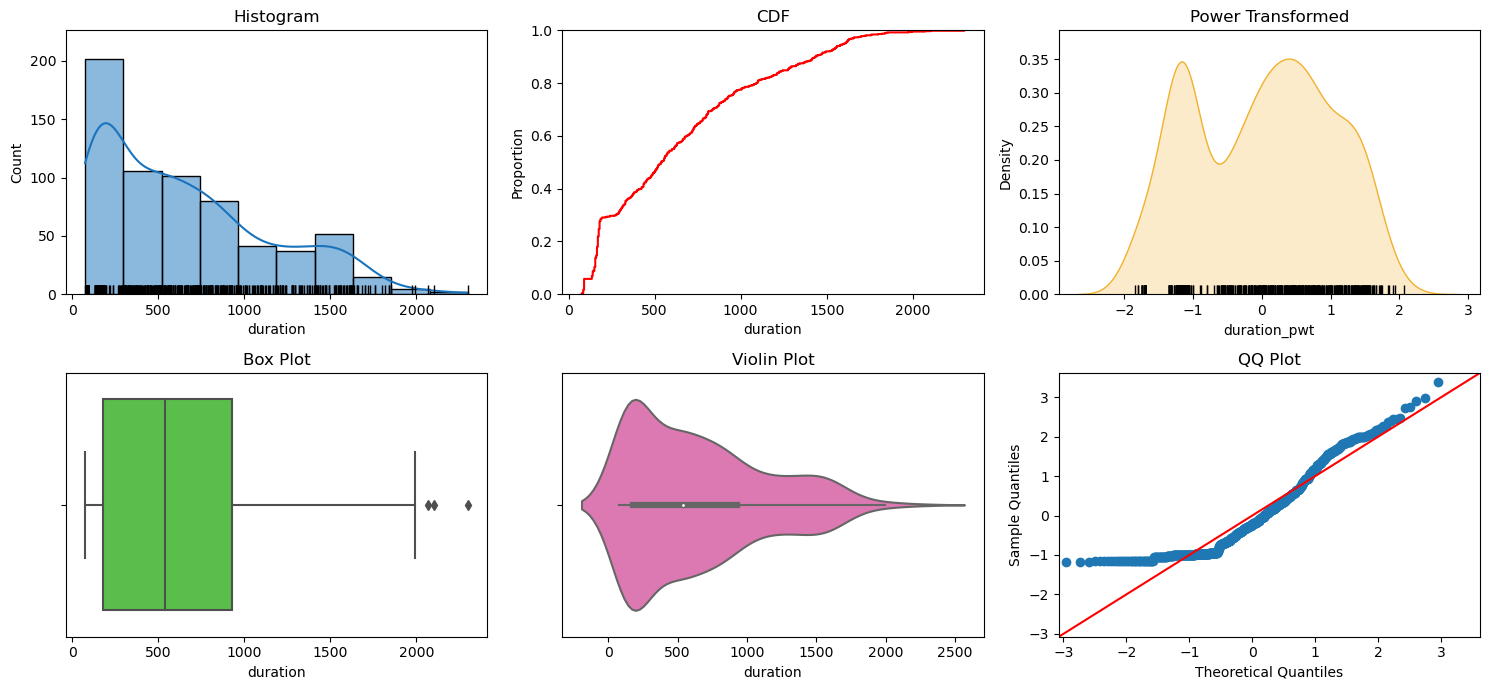

In [34]:
eda_helper_functions.num_univar_plots(train, "duration")

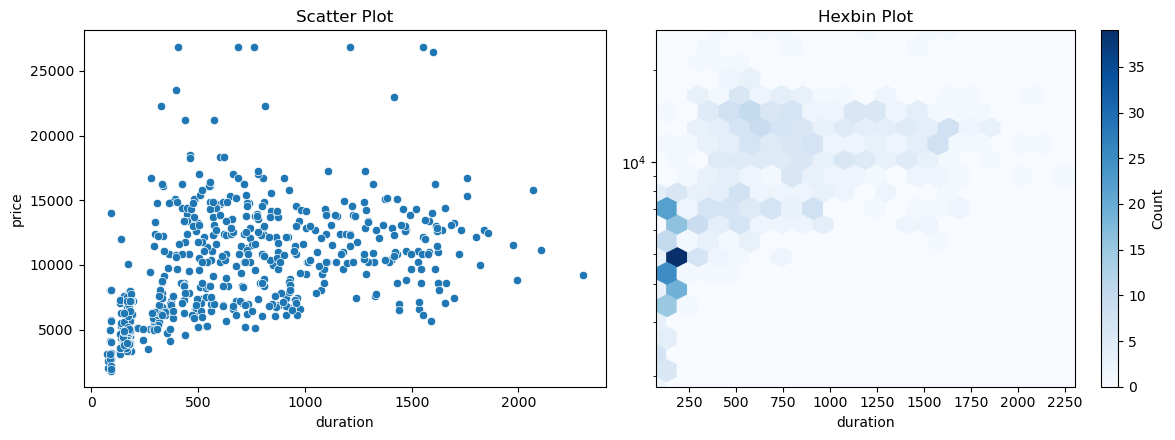

In [36]:
eda_helper_functions.num_bivar_plots(
    train,"duration","price",
    hexbin_kwargs= dict(
        yscale = "log",
        gridsize = 20,
        cmap = "Blues"
    )
    
)

In [38]:
eda_helper_functions.num_num_hyp_testing(train , "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5112655895660672
- p-value              : 6.498155885582415e-44
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6588016869463219
- p-value              : 6.658141189888565e-81
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


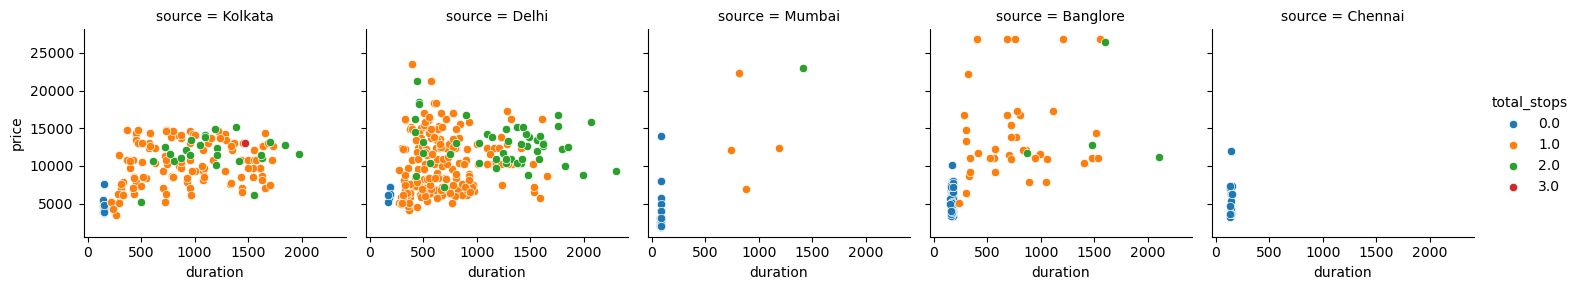

In [41]:
duration_grid = sns.FacetGrid(
    data = train, 
    col = "source",
    hue = "total_stops",
    sharey = True

)
duration_grid.map(sns.scatterplot,"duration", "price")
duration_grid.add_legend()

# Automated EDA

In [43]:
from ydata_profiling import ProfileReport

In [45]:
report = ProfileReport(train)
report.to_file(output_file= "output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]